In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1. Generate Synthetic Dataset (Red and Blue Images)
def create_dataset(num_samples=100, img_size=(64, 64)):
    X = []  # Images
    y = []  # Labels (0 for red, 1 for blue)

    for i in range(num_samples):
        # Create random images with red or blue dominance
        image = np.random.rand(*img_size, 3)  # Random RGB image

        if i % 2 == 0:  # Red-dominant image
            image[:, :, 0] += 0.5  # Boost red channel
            image = np.clip(image, 0, 1)  # Clip values to [0, 1]
            label = 0
        else:  # Blue-dominant image
            image[:, :, 2] += 0.5  # Boost blue channel
            image = np.clip(image, 0, 1)
            label = 1
        
        X.append(image)
        y.append(label)

    return np.array(X), np.array(y)

# Generate dataset
num_samples = 200  # Total number of samples
img_size = (64, 64)  # Image dimensions
X, y = create_dataset(num_samples, img_size)


def display_images(X, y, images_per_row=5):
    num_images = len(X)
    num_rows = (num_images + images_per_row - 1) // images_per_row  # Calculate number of rows
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row * 3, num_rows * 3))
    axes = axes.flatten()  # Flatten axes for easy iteration

    for i in range(len(axes)):
        if i < num_images:
            axes[i].imshow(X[i])  # Show the image
            axes[i].set_title("Red" if y[i] == 0 else "Blue")
        axes[i].axis('off')  # Turn off axis for clean display

    plt.tight_layout()
    plt.show()

# Visualize dataset
display_images(X, y, images_per_row=5)

In [15]:
# 2. Define the Model
model = Sequential([
    Flatten(input_shape=(img_size[0], img_size[1], 3)),  # Flatten the image into a 1D array
    Dense(32, activation='relu'),  # Fully connected layer
    Dense(16, activation='relu'),  # Another fully connected layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Binary classification loss
              metrics=['accuracy'])


In [17]:
# 3. Train the Model
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=10, 
                    batch_size=16)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5496 - loss: 0.7823 - val_accuracy: 1.0000 - val_loss: 0.0897
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0524 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 9.6514e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epo

In [18]:
# 4. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.5361e-04 
Test Accuracy: 1.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


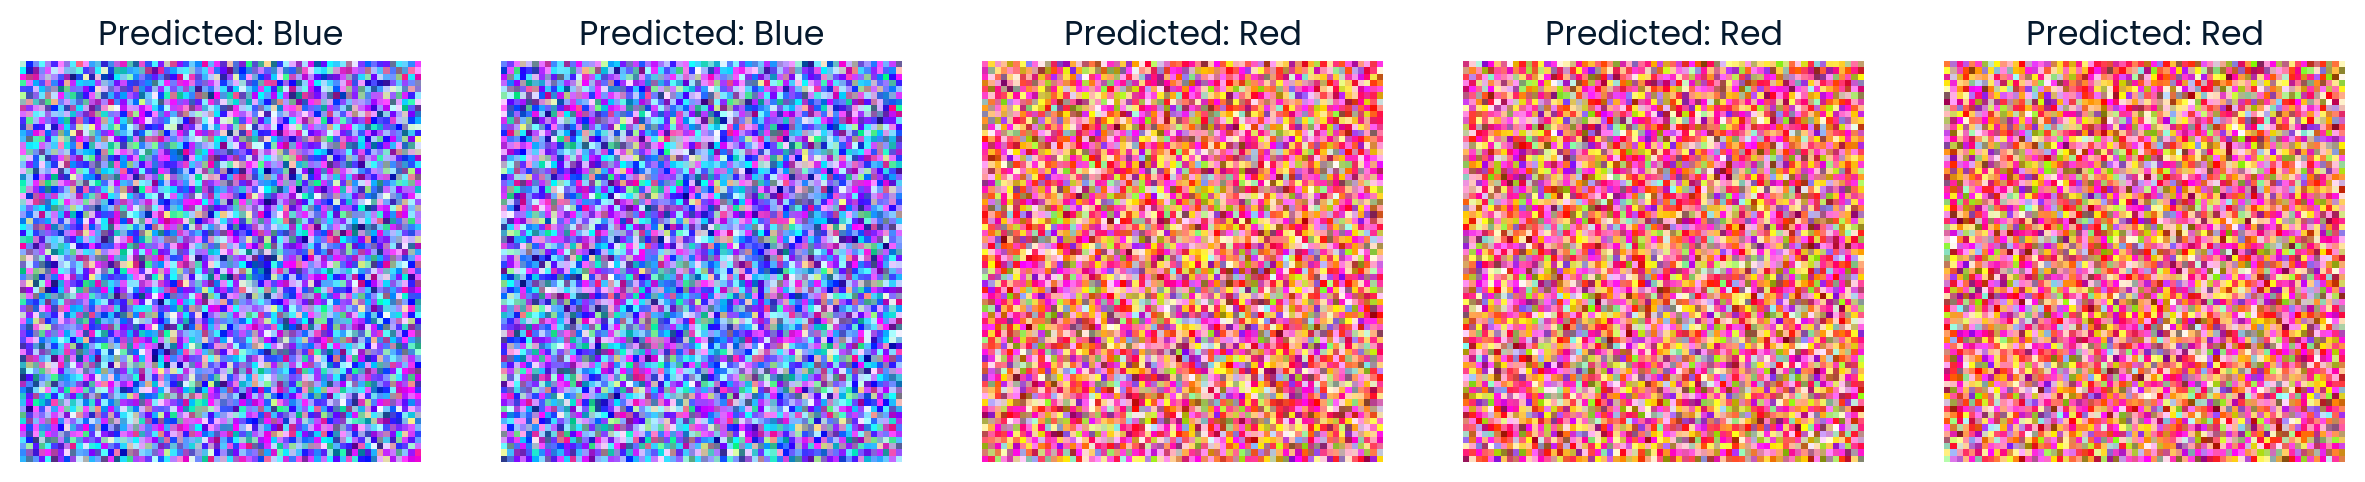

In [19]:
# 5. Test Predictions
def predict_image(img, model):
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    return "Red" if prediction[0][0] < 0.5 else "Blue"

# Visualize predictions on test images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    img = X_test[i]
    prediction = predict_image(img, model)
    axes[i].imshow(img)
    axes[i].set_title(f"Predicted: {prediction}")
    axes[i].axis('off')
plt.show()


    
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


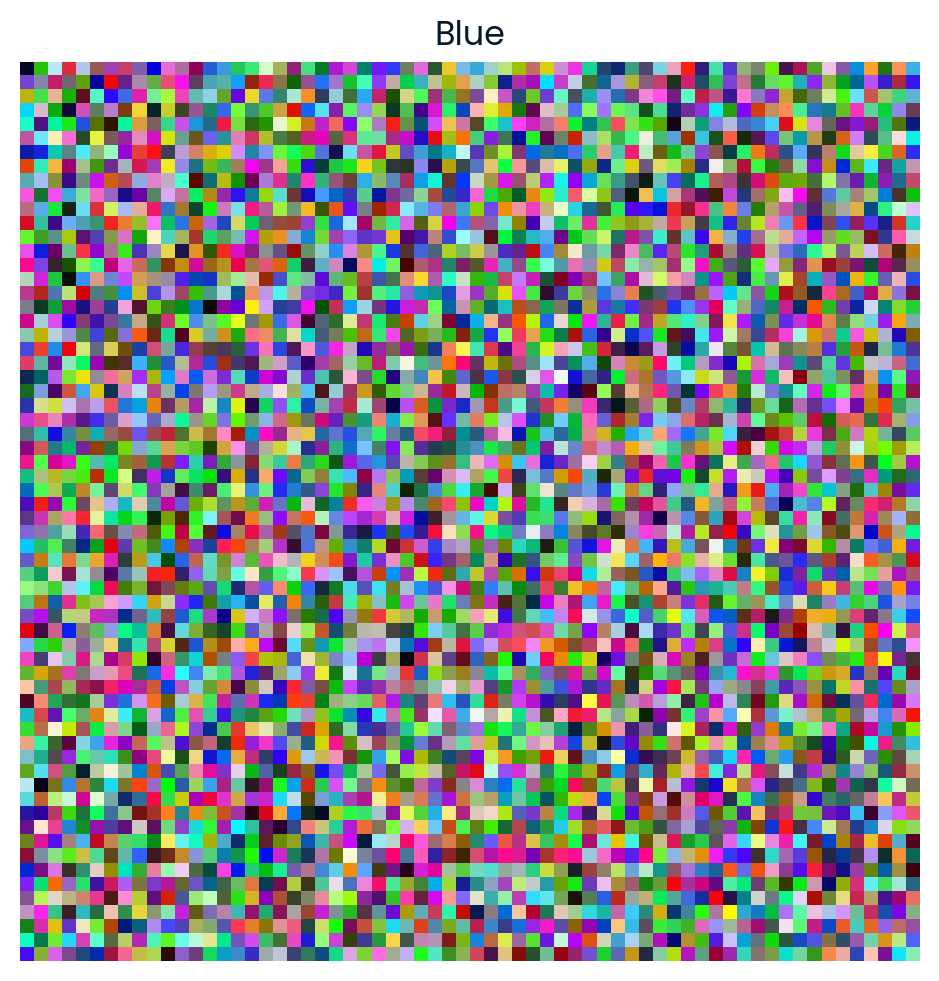

Blue


In [72]:
# Generate Random image and test if red or blue
import numpy as np
import matplotlib.pyplot as plt

img_size = (64, 64)  # Example image size
imager = np.random.rand(*img_size, 3)  # Random RGB image
imager = np.clip(imager, 0, 1)  # Clip values to [0, 1]
imager = np.expand_dims(imager, axis=0)  # Add batch dimension
prediction = model.predict(imager)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.imshow(imager[0])  # Show the image (remove batch dimension for display)
ax.set_title("Red" if prediction[0][0] < 0.5 else "Blue")
ax.axis('off')  # Turn off axis for clean display
plt.tight_layout()
plt.show()

if prediction[0][0] < 0.5: 
    print("Red")
else: 
    print("Blue")

In [22]:
# 6. Save the Model (Optional)
model.save('red_blue_classifier.keras')